<font size=5 > <p style="color:purple"> Welche Faktoren beeinflussen den Preis von Krankenversicherungen?

<font size='2'>Viele Faktoren, die sich auf die Höhe Ihrer Krankenversicherungsbeiträge auswirken, liegen nicht in Ihrem Einflussbereich. Trotzdem ist es gut, wenn Sie wissen, welche das sind. Hier sind einige Faktoren, die sich auf die Höhe der Krankenversicherungsprämien auswirken

* **Alter:** Alter des Hauptbegünstigten

* **Geschlecht:** Geschlecht des Versicherungsvertragsnehmers, weiblich, männlich

* **bmi:** Body-Mass-Index, bietet ein Verständnis des Körpers, Gewichte, die relativ hoch oder niedrig im Verhältnis zur Höhe, objektive Index des Körpergewichts (kg / m ^ 2) mit dem Verhältnis von Höhe zu Gewicht, idealerweise 18,5 bis 24,9 sind

* **Kinder:** Anzahl der krankenversicherten Kinder / Anzahl der unterhaltsberechtigten Personen

* **Raucher:** Rauchen

* **Region:** Wohngebiet des Begünstigten in den USA, Nordosten, Südosten, Südwesten, Nordwesten



<font size=5><p style="color:purple"> EDA and Visualizations 

In [1]:

import pandas as pd
import numpy as np
import statsmodels
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<font size='2' font>Analysieren wir nun die Versicherungskosten nach Alter, BMI und Kindern nach dem Faktor Rauchen 

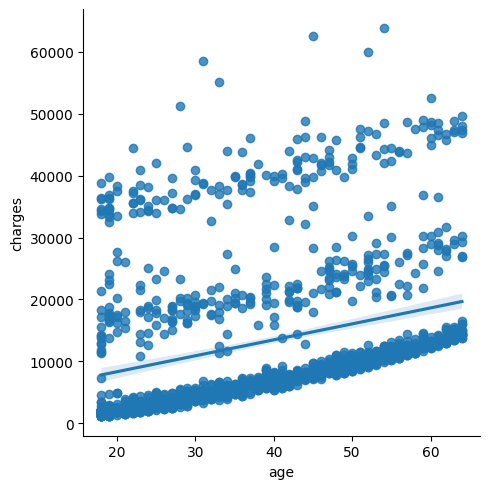

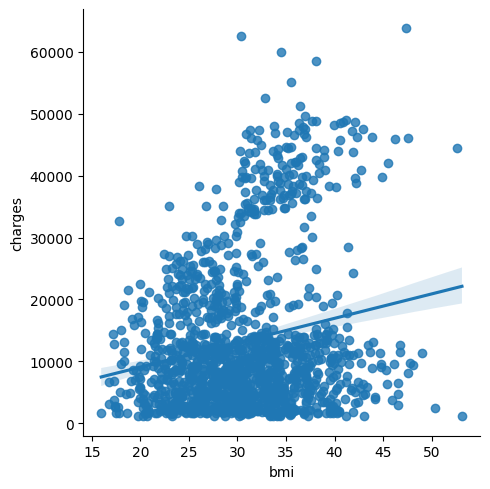

In [8]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, palette='Set2')

In [9]:
##Umwandlung von Objektbeschriftungen in kategorische
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes
#df.head()

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [10]:
##Umwandlung von Kategoriebezeichnungen in numerische Werte mit LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


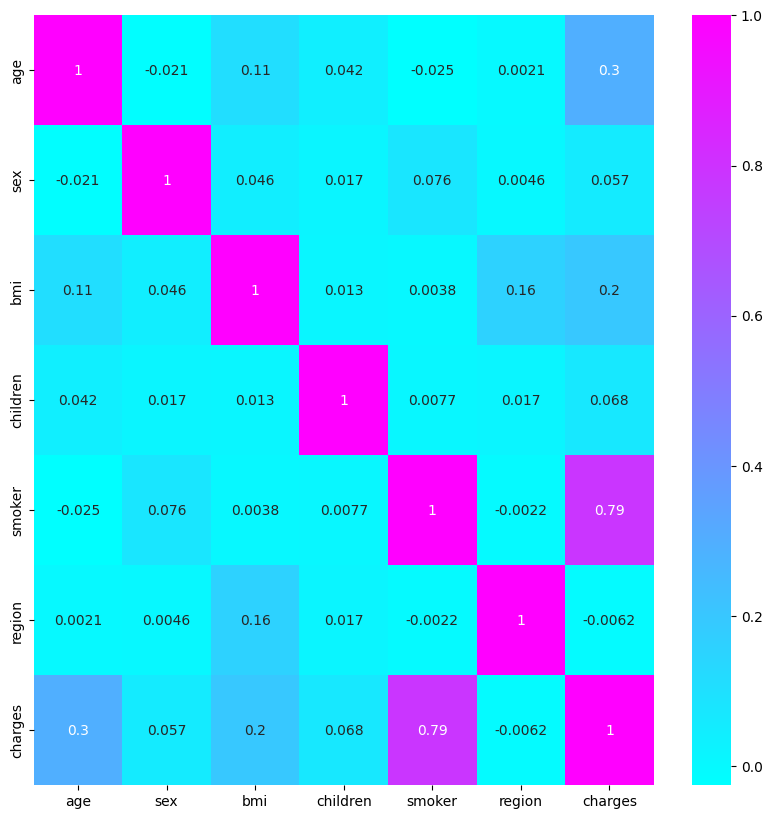

In [11]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

<font size='2' font>Keine Korrelation, außer mit dem Rauchen 

<font size=5><p style="color:purple"> Lineare Regression

<font size=2><p style="color:blue"> Funktionen für Evaluation der Ergebnisse

In [12]:
from sklearn import metrics


def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    

    

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     496.0
Date:                Thu, 05 Dec 2024   Prob (F-statistic):          5.53e-304
Time:                        11:14:05   Log-Likelihood:                -10852.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1063   BIC:                         2.175e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.166e+04   1079.677    -10.801      0.0

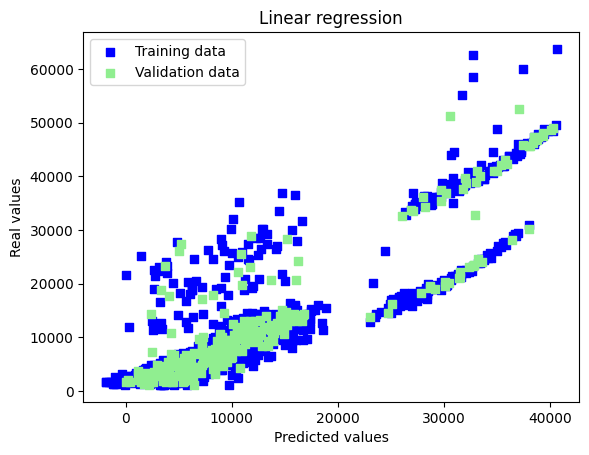

In [13]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from scipy import stats

x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)


############
####Linear Regression with p-values
import statsmodels.api as sm
from scipy import stats
x_train=sm.add_constant(x_train)
est = sm.OLS(y_train, x_train)
est2 = est.fit()
print(est2.summary())



##Predicting the charges
x_test = sm.add_constant(x_test)
test_pred = est2.predict(x_test)
train_pred = est2.predict(x_train)


print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


# Plot predictions
plt.scatter(train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([0, 0], [60000, 60000], c = "red")
plt.show()


<font size=5><p style="color:purple"> Lasso Regression

Best alpha : 38.6
Test set evaluation:
_____________________________________
MAE: 3961.2379878452516
MSE: 32285781.425347585
RMSE: 5682.057851284831
R2 Square 0.7971106072406923
__________________________________
Train set evaluation:
_____________________________________
MAE: 4253.688727531416
MSE: 37838988.98170474
RMSE: 6151.340421542669
R2 Square 0.7360674826489861
__________________________________
const           0.000000
age           254.601358
sex             0.000000
bmi           319.510706
children      406.626248
smoker      23351.282109
region          0.000000
dtype: float64


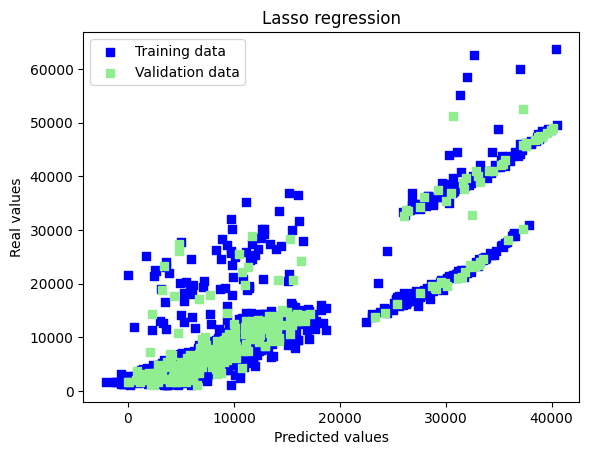

In [14]:
from sklearn.linear_model import Lasso, LassoCV

lasso = LassoCV(alphas = [38.6, 38.8, 40, 40.2, 40.4, 40.5, 40.7,50], 
                max_iter = 50000, cv = 10)
lasso.fit(x_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)


model = Lasso(alpha=alpha, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(x_train, y_train)

test_pred = model.predict(x_test)
train_pred = model.predict(x_train)



print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


#pd.Series(model.coef_, x_train.columns).sort_values(ascending = True).plot(kind = "bar")
coefs_lasso = pd.Series(model.coef_, index = x_train.columns)
print(coefs_lasso.head(10))

# Plot predictions
plt.scatter(train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Lasso regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.show()


<font size=5><p style="color:purple"> Ridge Regression

Best alpha : 0.2
Test set evaluation:
_____________________________________
MAE: 3932.862446385453
MSE: 31856953.783487696
RMSE: 5644.196469249427
R2 Square 0.7998054337560899
__________________________________
Train set evaluation:
_____________________________________
MAE: 4237.154915901001
MSE: 37729700.23110406
RMSE: 6142.450669814456
R2 Square 0.736829787769721
__________________________________
const           0.000000
age           253.952544
sex           -23.196045
bmi           328.377355
children      443.933450
smoker      23541.667520
region       -288.716788
dtype: float64


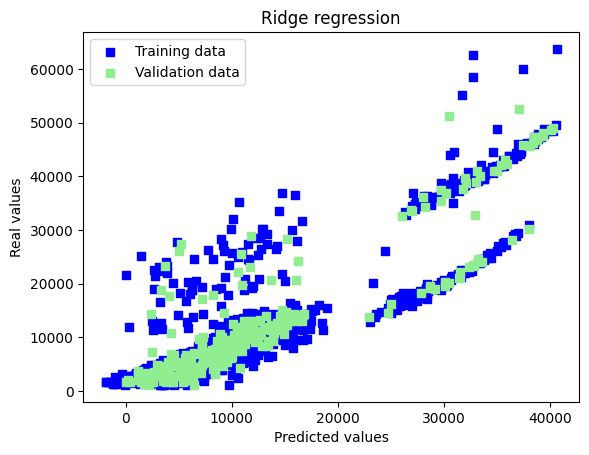

In [15]:
from sklearn.linear_model import Ridge, RidgeCV
ridge = RidgeCV(alphas = [0.06, 0.08, 0.09, 0.1, 0.14, 0.15, 0.2, 0.3, 0.6, 1, 3, 6])
ridge.fit(x_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

model = Ridge(alpha=alpha, solver='cholesky', tol=0.0001, random_state=42)
model.fit(x_train, y_train)
pred = model.predict(x_test)

test_pred = model.predict(x_test)
train_pred = model.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

# Plot important coefficients
#pd.Series(model.coef_, x_train.columns).sort_values(ascending = True).plot(kind = "bar")
coefs_ridge = pd.Series(model.coef_, index = x_train.columns)
print(coefs_ridge.head(10))

# Plot predictions
plt.scatter(train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Ridge regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.show()


<font size=5><p style="color:purple"> Deep Learning

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 306372032.0000 - val_loss: 335070400.0000
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 274876992.0000 - val_loss: 276478656.0000
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 209878304.0000 - val_loss: 152507392.0000
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 138560240.0000 - val_loss: 134351360.0000
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 131425664.0000 - val_loss: 134959328.0000
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 134318464.0000 - val_loss: 133946552.0000
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 127257376.0000 - val_loss: 133666904.0000
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 128379824.0000 - val_loss: 133466936.0000
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 130899224.0000 - val_loss: 133434672.0000
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 132530888.0000 - val_loss: 132512496.0000

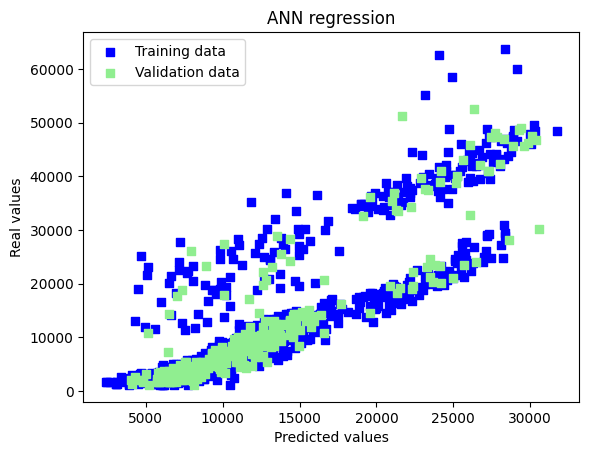

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

# Define Tensorboard as a Keras callback
#Wie sehe ich Tensorboard: In terminal--> tensorboard --logdir=./logs
tensorboard = TensorBoard(
  log_dir='.\logs',
  histogram_freq=1,
  write_images=True
)
keras_callbacks = [
  tensorboard
]


x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(0.01), loss='mse')

r = model.fit(x_train, y_train,
              validation_data=(x_test,y_test),
              batch_size=32,
              epochs=50,
              callbacks=keras_callbacks)

test_pred = model.predict(x_test)
train_pred = model.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


# Plot predictions
plt.scatter(train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("ANN regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.show()

